In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:12<00:00, 183MB/s]
100% 1.06G/1.06G [00:12<00:00, 93.8MB/s]


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [ ]:
from zipfile import ZipFile

data_path = '/content/dogs-vs-cats.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')


The data set has been extracted.


In [ ]:
path = '/content/train'
classes = os.listdir(path)
classes


['cats', 'dogs']

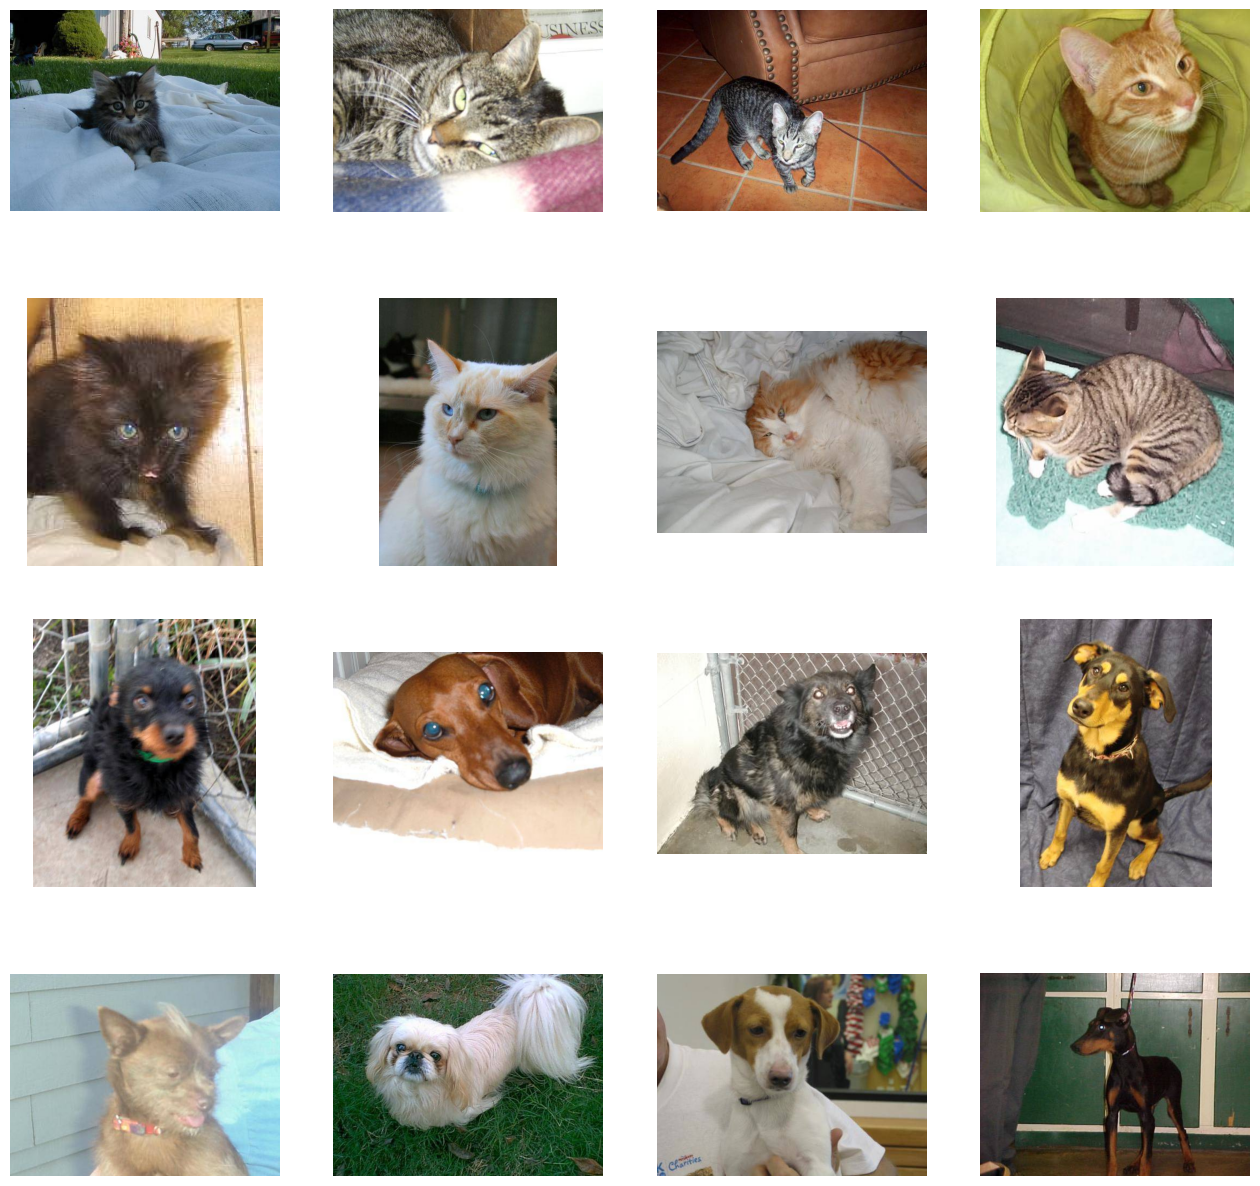

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/train/cats')
dog_dir = os.path.join('/content/train/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [ ]:
base_dir = '/content/test'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 5000 files belonging to 2 classes.
Using 4500 files for training.
Found 5000 files belonging to 2 classes.
Using 500 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

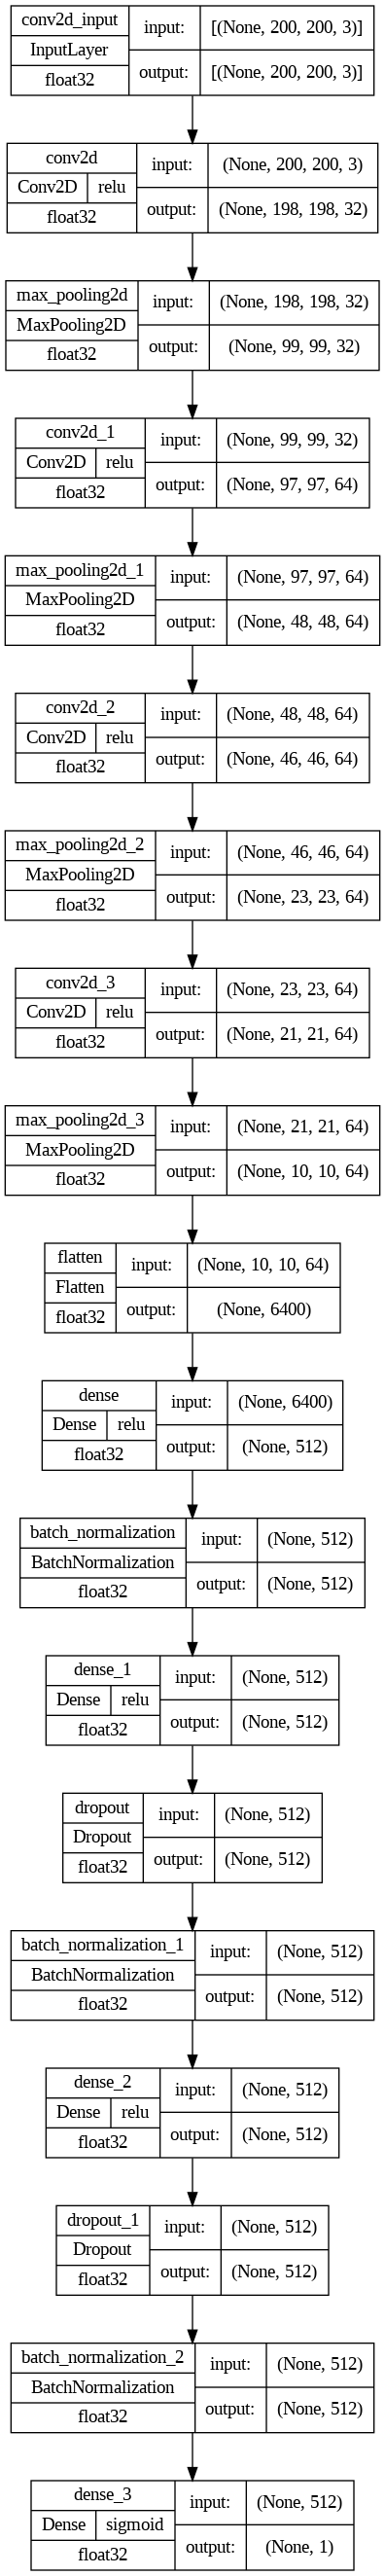

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [ ]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [ ]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)


Epoch 1/10
141/141 [==============================] - 21s 70ms/step - loss: 0.8113 - accuracy: 0.5529 - val_loss: 0.8980 - val_accuracy: 0.5060
Epoch 2/10
141/141 [==============================] - 7s 50ms/step - loss: 0.6867 - accuracy: 0.6084 - val_loss: 1.7300 - val_accuracy: 0.5060
Epoch 3/10
141/141 [==============================] - 8s 57ms/step - loss: 0.6492 - accuracy: 0.6447 - val_loss: 1.0090 - val_accuracy: 0.5220
Epoch 4/10
141/141 [==============================] - 7s 51ms/step - loss: 0.6010 - accuracy: 0.6840 - val_loss: 1.9997 - val_accuracy: 0.5160
Epoch 5/10
141/141 [==============================] - 8s 53ms/step - loss: 0.5574 - accuracy: 0.7249 - val_loss: 0.5472 - val_accuracy: 0.7400
Epoch 6/10
141/141 [==============================] - 8s 56ms/step - loss: 0.5290 - accuracy: 0.7398 - val_loss: 2.9940 - val_accuracy: 0.5060
Epoch 7/10
141/141 [==============================] - 8s 57ms/step - loss: 0.6512 - accuracy: 0.6249 - val_loss: 2.2954 - val_accuracy: 0.500

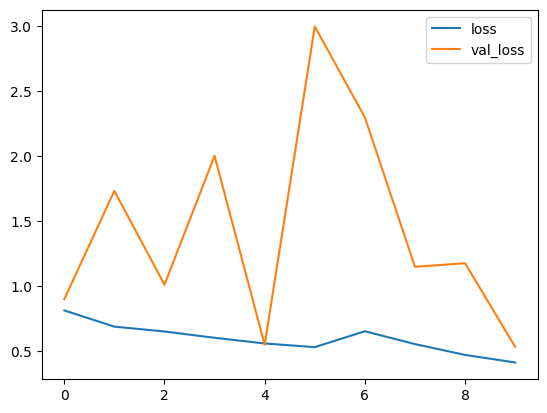

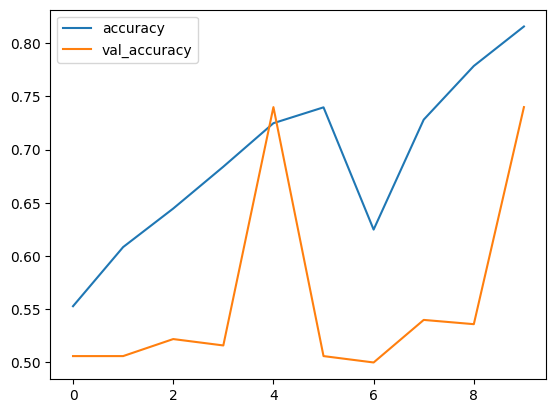

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


1/1 [==============================] - 1s 520ms/step
Dog


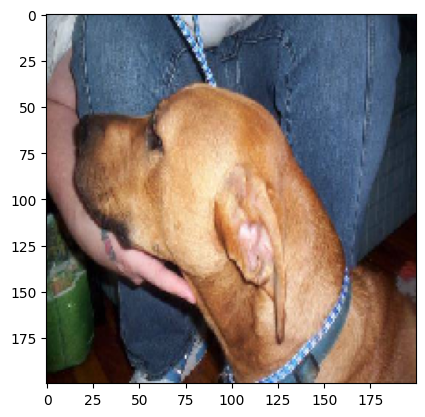

In [ ]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/test/dogs/dog.10044.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
    print("Dog")
else:
    print("Cat")


1/1 [==============================] - 0s 21ms/step
Dog


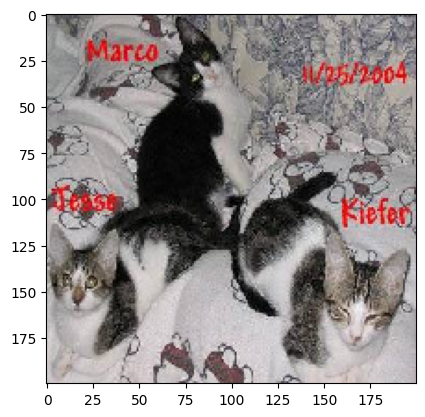

In [ ]:
test_image = image.load_img('/content/test/cats/cat.2970.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")
